# Market Depth of V3 LP Pools

## Intro

### Imports

In [50]:
import os
from dotenv import load_dotenv

In [51]:
import plotly.express as px
import pandas as pd

from quantnote_api.quantnote_api import QuantNoteApi


### Create client instance

In [52]:

load_dotenv()
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = QuantNoteApi(auth_token=AUTH_TOKEN)
client

## Example

Select `contract` of LP Pool, _time interval_.

In [53]:
contract = "0x4e68Ccd3E89f51C3074ca5072bbAC773960dFa36"
from_ = "2023-02-27"
to = "2023-03-01"
chain = 1

lp_token = client.get_lp_token(contract=contract, chain=chain)
lp_token

LPTokenResponse(
	id = 411,
	name = UniswapV3Pool,
	symbol = WETH/USDT,
	chain = ETH,
	decimals = 0.0,
	total_supply = 0.0,
	contract = 0x4e68Ccd3E89f51C3074ca5072bbAC773960dFa36,
	token_0 = TokenResponse(
		id = 2,
		name = Wrapped Ether,
		symbol = WETH,
		chain = ETH,
		active = False,
		decimals = 18.0,
		total_supply = 4000996.6235593213,
		circulating_supply = 4000996.572677392,
		contract = 0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,
	),
	token_1 = TokenResponse(
		id = 8,
		name = Tether USD,
		symbol = USDT,
		chain = ETH,
		active = False,
		decimals = 6.0,
		total_supply = 30283904986.788567,
		circulating_supply = 30283899385.706886,
		contract = 0xdAC17F958D2ee523a2206206994597C13D831ec7,
	),
)

In [54]:
market_depth = pd.DataFrame([l.__dict__ for l in client.get_market_depth(
    pool_contract=contract,
    from_=from_,
    to=to,
    chain=chain,
)]).set_index("time")
market_depth

,current_price,depth
time,,
2023-02-26 23:04:00+00:00,1632.769201,"[['1626.2514939607108', '317.29211540756495', ..."
2023-02-26 23:06:00+00:00,1638.329786,"[['1636.0378433056312', '313.1885745936008', '..."
2023-02-26 23:09:00+00:00,1638.329786,"[['1636.0378433056312', '313.1885745936008', '..."
2023-02-26 23:26:00+00:00,1638.329786,"[['1636.0378433056312', '313.1885745936008', '..."
2023-02-26 23:27:00+00:00,1638.329786,"[['1636.0378433056312', '313.1885745936008', '..."
...,...,...
2023-02-28 16:24:00+00:00,1641.609560,"[['1636.0378433056312', '316.68376625624114', ..."
2023-02-28 16:25:00+00:00,1641.609560,"[['1636.0378433056312', '316.68376625624114', ..."
2023-02-28 16:26:00+00:00,1641.609560,"[['1636.0378433056312', '316.68376625624114', ..."


Pick a time with market depth data and create a graph (for example select last one).

In [55]:
last_depth = market_depth.tail(1)
last_depth

,current_price,depth
time,,
2023-02-28 16:32:00+00:00,1641.60956,"[['1636.0378433056312', '316.68501430400534', ..."


In [56]:
last_depth_string = last_depth['depth'][-1]
ss = eval(last_depth_string)


df = pd.DataFrame(ss, columns=['level', 'token0_volume', 'token1_volume'])
df['level'] = pd.to_numeric(df['level'])
df['token0_volume'] = pd.to_numeric(df['token0_volume'])
df['token1_volume'] = pd.to_numeric(df['token1_volume'])
print(df)


           level  token0_volume  token1_volume
0    1636.037843     316.685014  518108.667809
1    1645.883084     334.062204  551479.207345
2    1655.787571     333.074003  553156.695327
3    1665.751661     326.117911  544863.511281
4    1675.775712     325.132388  546485.877870
..           ...            ...            ...
96   1241.463802     240.978864  300065.339294
97   1234.037691     241.680977  299139.463430
98   1226.656001     242.372565  298200.979411
99   1219.318466     242.615156  296713.902813
100  1212.024823     228.448459  277717.064457

[101 rows x 3 columns]


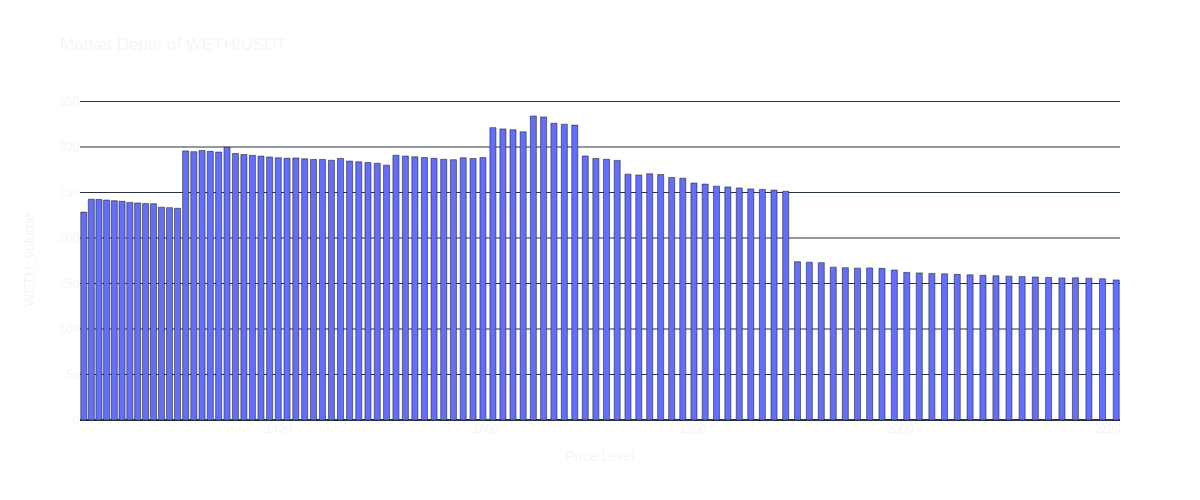

In [57]:
fig = px.bar(df, y='token0_volume', x='level', text_auto='.2s',
            title="Market Depth of {lp_token}".format(lp_token=lp_token.symbol))
fig.update_layout(
    width=1200,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
# Set y-axes titles
fig.update_yaxes(title_text="{token}_volume".format(token=lp_token.token_0.symbol))
fig.update_xaxes(title_text="Price Level")
fig.show('png')


In [58]:
print("Current price: 1 {token0} = {price} {token1}".format(token0=lp_token.token_0.symbol, price=last_depth['current_price'][-1], token1=lp_token.token_1.symbol))

Current price: 1 WETH = 1641.6095599428127 USDT
